In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas.plotting import parallel_coordinates

In [2]:
sns.set()

In [3]:
df = pd.read_csv("master.csv")

In [4]:
df["country"].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [5]:
dfc= df[df["country"] == "Colombia"].reset_index()
dfc.drop(["index"], axis = 1, inplace = True)
dfc = dfc.rename(columns = {" gdp_for_year ($) ":"gdp_for_year", "gdp_per_capita ($)":"gdp_per_capita"})
dfc["gdp_for_year"] = dfc["gdp_for_year"].str.replace(",", "")
dfc["gdp_for_year"] = pd.to_numeric(dfc["gdp_for_year"])

In [6]:
dfc.shape

(372, 12)

In [7]:
dfc.isna().sum()

country                0
year                   0
sex                    0
age                    0
suicides_no            0
population             0
suicides/100k pop      0
country-year           0
HDI for year         252
gdp_for_year           0
gdp_per_capita         0
generation             0
dtype: int64

Como se puede apreciar en la tabla de valores nulos, la variable "HDI for Year" presenta más de la mitad del tamaño del conjunto de datos como valor nulo. Por lo tanto, no se dispondra de esta variable, de manera adicional, la varibale "country-year" presenta información redundante y se procede a eliminar. 

In [8]:
dfc = dfc.drop(columns=["HDI for year","country-year"], axis = 1)

In [9]:
dfc.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year,gdp_per_capita,generation
0,Colombia,1985,male,75+ years,21,123400,17.02,34894411352,1393,G.I. Generation
1,Colombia,1985,male,55-74 years,113,1015200,11.13,34894411352,1393,G.I. Generation
2,Colombia,1985,male,25-34 years,193,2323700,8.31,34894411352,1393,Boomers
3,Colombia,1985,male,15-24 years,256,3190200,8.02,34894411352,1393,Generation X
4,Colombia,1985,male,35-54 years,188,2451100,7.67,34894411352,1393,Silent


In [70]:
bars = pd.DataFrame(dfc[["year", "gdp_per_capita"]])

In [75]:
bars = bars.loc[:,~bars.columns.duplicated()]
bars

,year,gdp_per_capita
0,1985,1393
1,1985,1393
2,1985,1393
3,1985,1393
4,1985,1393
...,...,...
367,2015,6552
368,2015,6552
369,2015,6552
370,2015,6552


Text(0, 0.5, '')

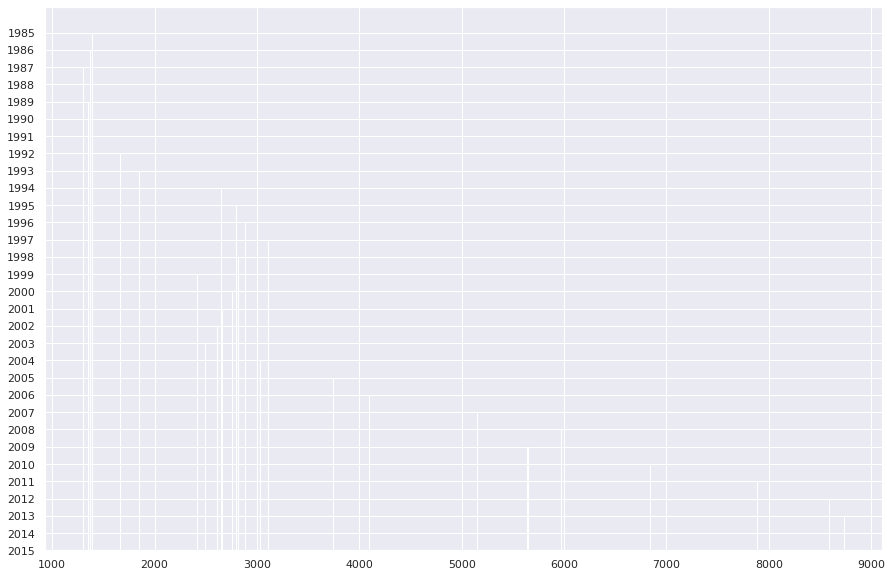

In [93]:
gdp_cap = pd.DataFrame(bars.groupby("year", as_index= False).mean())
gdp_cap = gdp_cap.sort_values("year", ascending=False)
gdp_cap["year"] = gdp_cap['year'].astype(int).astype(str)
plt.figure(figsize=(15,10))
plt.bar(gdp_cap["gdp_per_capita"], gdp_cap["year"], color='green')
#sns.barplot(y="year", x="gdp_per_capita", data = gdp_cap)
#sns.barplot(y="year", x="gdp_per_capita", data = gdp_cap)
plt.title("")
plt.xlabel("")
plt.ylabel("")

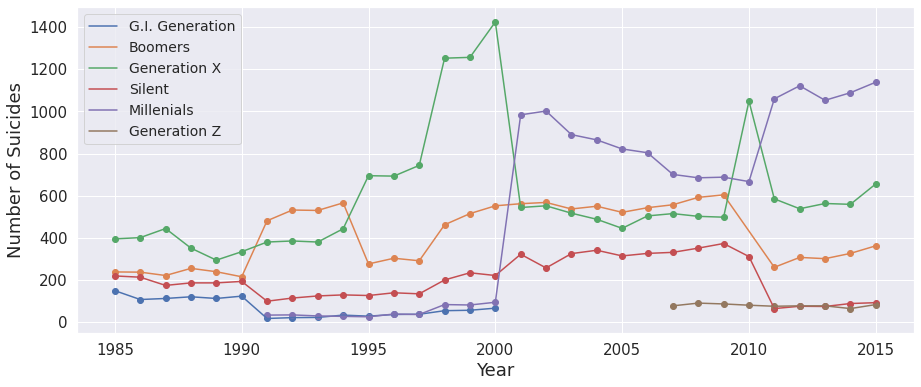

In [10]:
y = []
x = []
for i in dfc.generation.unique():
    aux = dfc[dfc['generation']==i]
    x.append(aux['year'].unique())
    aux = aux.groupby(by=["year"]).sum()
    y.append(aux['suicides_no'])

plt.figure(figsize=(15,6))
for i in range(len(y)):
    plt.plot(x[i],y[i],label=dfc.generation.unique()[i])
    plt.scatter(x[i],y[i])
plt.legend(fontsize=14)
plt.xlabel('Year',fontsize=18)
plt.ylabel('Number of Suicides',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

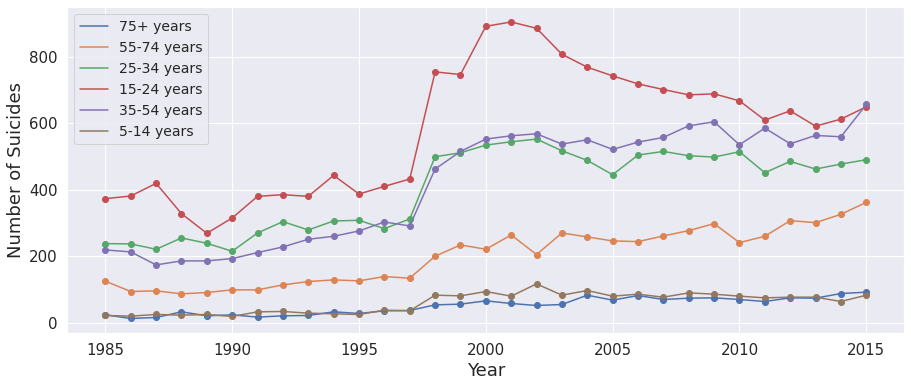

In [11]:
y = []
x = []
for i in dfc.age.unique():
    aux = dfc[dfc['age']==i]
    x.append(aux['year'].unique())
    aux = aux.groupby(by=["year"]).sum()
    y.append(aux['suicides_no'])

plt.figure(figsize=(15,6))
for i in range(len(y)):
    plt.plot(x[i],y[i],label=dfc.age.unique()[i])
    plt.scatter(x[i],y[i])
plt.legend(fontsize=14)
plt.xlabel('Year',fontsize=18)
plt.ylabel('Number of Suicides',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

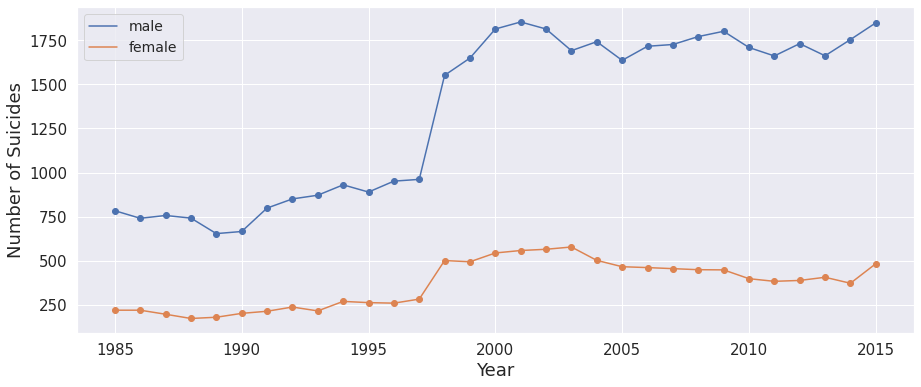

In [12]:
y = []
x = []
for i in dfc.sex.unique():
    aux = dfc[dfc['sex']==i]
    x.append(aux['year'].unique())
    aux = aux.groupby(by=["year"]).sum()
    y.append(aux['suicides_no'])

plt.figure(figsize=(15,6))
for i in range(len(y)):
    plt.plot(x[i],y[i],label=dfc.sex.unique()[i])
    plt.scatter(x[i],y[i])
plt.legend(fontsize=14)
plt.xlabel('Year',fontsize=18)
plt.ylabel('Number of Suicides',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

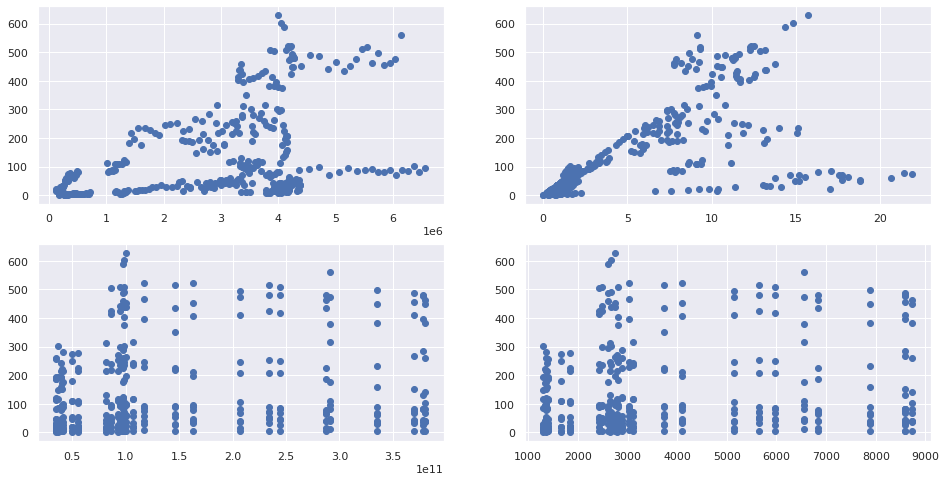

In [13]:
#population	suicides/100k pop	gdp_for_year	gdp_per_capita
plt.figure(figsize=(16,8))
plt.subplot(221)
plt.scatter(dfc['population'],dfc['suicides_no'])
plt.subplot(222)
plt.scatter(dfc['suicides/100k pop'],dfc['suicides_no'])
plt.subplot(223)
plt.scatter(dfc['gdp_for_year'],dfc['suicides_no'])
plt.subplot(224)
plt.scatter(dfc['gdp_per_capita'],dfc['suicides_no'])
plt.show()

    sex  suicides_no  suicides/100k pop
0  male           21              17.02
1  male          113              11.13
2  male          193               8.31
3  male          256               8.02
4  male          188               7.67


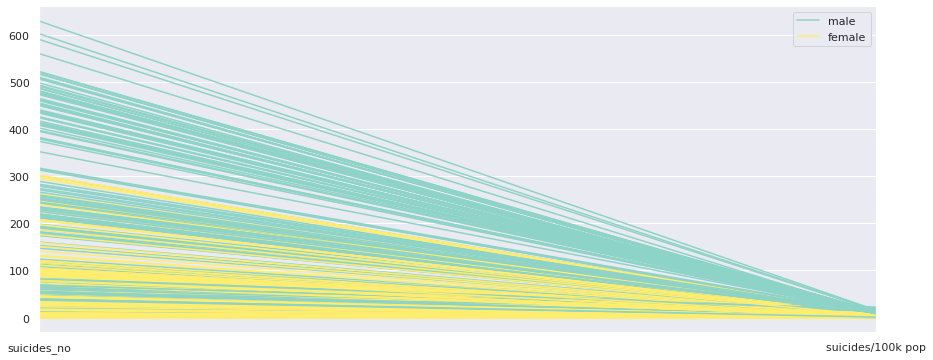

In [14]:
df_ = dfc.drop(columns=['country','year','age','population','gdp_for_year','gdp_per_capita','generation'],axis=1)
print(df_.head())
plt.figure(figsize=(15,6))
parallel_coordinates(df_, 'sex',colormap=plt.get_cmap("Set3"),)
plt.grid()
plt.show()

In [36]:
dfc.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'gdp_for_year', 'gdp_per_capita', 'generation'],
      dtype='object')

In [43]:
chart_sui = pd.DataFrame(dfc.groupby(by=["year","sex"], as_index = False).sum()) \
              .drop(["population", "suicides/100k pop", "gdp_for_year", "gdp_per_capita"], axis = 1)
chart_sui

,year,sex,suicides_no
0,1985,female,218
1,1985,male,783
2,1986,female,218
3,1986,male,740
4,1987,female,195
...,...,...,...
57,2013,male,1663
58,2014,female,371
59,2014,male,1755
60,2015,female,482


In [44]:
female = chart_sui[chart_sui["sex"] == "female"].rename(columns = {"suicides_no": "female"})
male = chart_sui[chart_sui["sex"] == "male"].rename(columns = {"suicides_no": "male"})

In [47]:
del male["sex"]
del female["sex"]

In [50]:
suicides = female.join(male.set_index("year"), on = "year")

In [51]:
ordered_df = suicides.sort_values(by='year')
my_range=range(1,len(suicides.index)+1)

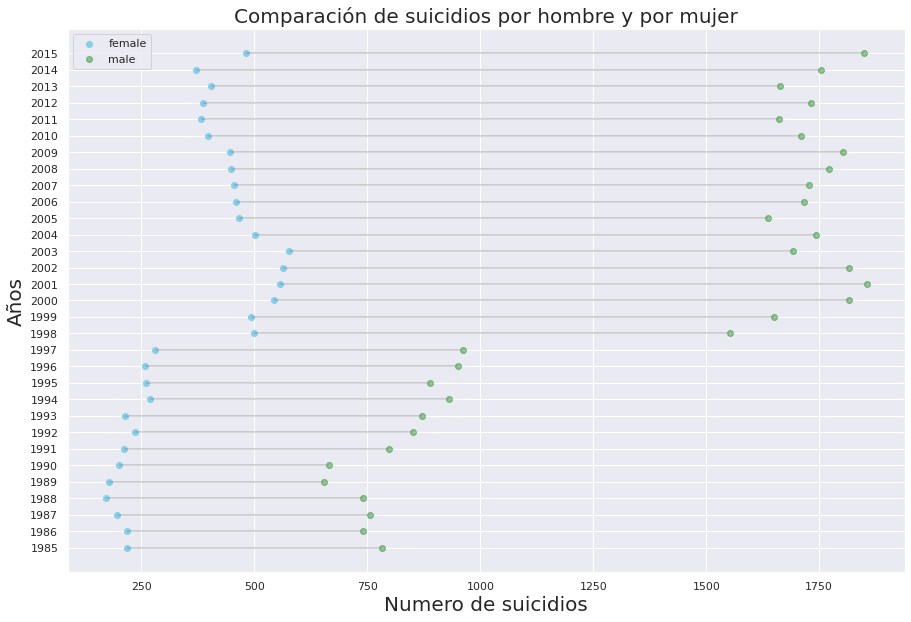

In [58]:
plt.figure(figsize=(15,10))
plt.hlines(y=my_range, xmin=ordered_df['female'], xmax=ordered_df['male'], color='grey', alpha=0.4)
plt.scatter(ordered_df['female'], my_range, color='skyblue', alpha=1, label='female')
plt.scatter(ordered_df['male'], my_range, color='green', alpha=0.4 , label='male')
plt.legend()
 
# Add title and axis names
plt.yticks(my_range, ordered_df['year'])
plt.title("Comparación de suicidios por hombre y por mujer", loc='center', fontsize=20)
plt.xlabel('Numero de suicidios', fontsize=20)
plt.ylabel('Años', fontsize=20)

# Show the graph
plt.show()

In [ ]:
df_ = dfc.drop(columns=['country','sex','year','age','population','gdp_for_year','gdp_per_capita','generation'],axis=1)
print(df_.head())
plt.figure(figsize=(15,6))
parallel_coordinates(df_, 'sex',colormap=plt.get_cmap("Set3"),)
plt.show()